In [39]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

In [40]:
dataset = tfds.load('horses_or_humans', split=['train'], as_supervised=True)

array = np.vstack(tfds.as_numpy(dataset[0]))
X = np.array(list(map(lambda x: x[0], array)))
y = np.array(list(map(lambda x: x[1], array)))

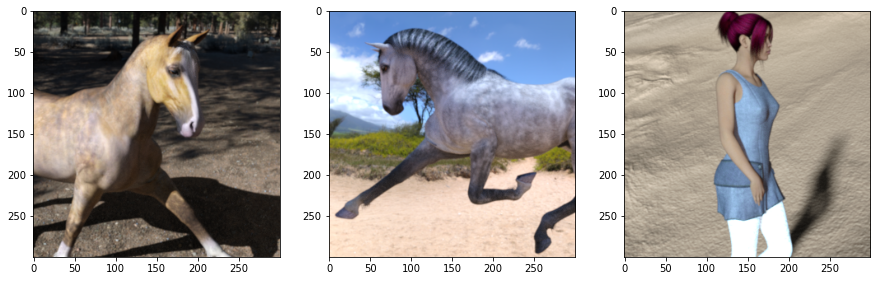

In [41]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,15))
ax1.imshow(X[0])
ax2.imshow(X[50])
ax3.imshow(X[100])

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=133, shuffle=True)

y_train = y_train.reshape(len(y_train), 1)
y_test = y_test.reshape(len(y_test), 1)

In [43]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten

restnet = ResNet50(include_top=False, weights='imagenet', input_shape=(300,300,3))

for layer in restnet.layers:
    layer.trainable = False

model = Sequential()
model.add(restnet)
model.add(Flatten())
model.add(Dense(16, activation='relu', input_dim=(300,300,3)))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 10, 10, 2048)      23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 204800)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                3276816   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 26,864,545
Trainable params: 3,276,833
Non-trainable params: 23,587,712
_________________________________________________________________


In [44]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    x=X_train,
    y=y_train,
    epochs=5,
    verbose=1,
    validation_data=(X_test, y_test),
)

Epoch 1/5
22/22 [==============================] - 172s 8s/step - loss: 0.4458 - accuracy: 0.9491 - val_loss: 0.0205 - val_accuracy: 0.9971
Epoch 2/5
22/22 [==============================] - 164s 7s/step - loss: 4.8638e-13 - accuracy: 1.0000 - val_loss: 0.0633 - val_accuracy: 0.9971
Epoch 3/5
22/22 [==============================] - 167s 8s/step - loss: 5.9052e-20 - accuracy: 1.0000 - val_loss: 0.0687 - val_accuracy: 0.9971
Epoch 4/5
22/22 [==============================] - 167s 8s/step - loss: 9.0226e-20 - accuracy: 1.0000 - val_loss: 0.0694 - val_accuracy: 0.9971
Epoch 5/5
22/22 [==============================] - 167s 8s/step - loss: 9.9145e-20 - accuracy: 1.0000 - val_loss: 0.0694 - val_accuracy: 0.9971


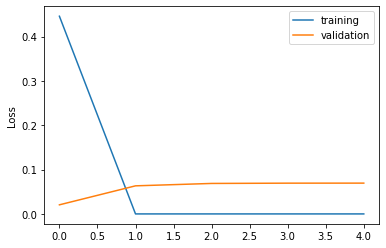

In [45]:
plt.figure()
plt.plot(range(5), history.history['loss'])
plt.plot(range(5), history.history['val_loss'])
plt.ylabel('Loss')
plt.legend(['training','validation'])

In [9]:
predict = model.predict(X_test)

Note: 0 is horse and 1 is human

Figure 1 is: [1.] 

Figure 2 is: [0.]


Text(0.5, 1.0, "It's a horse")

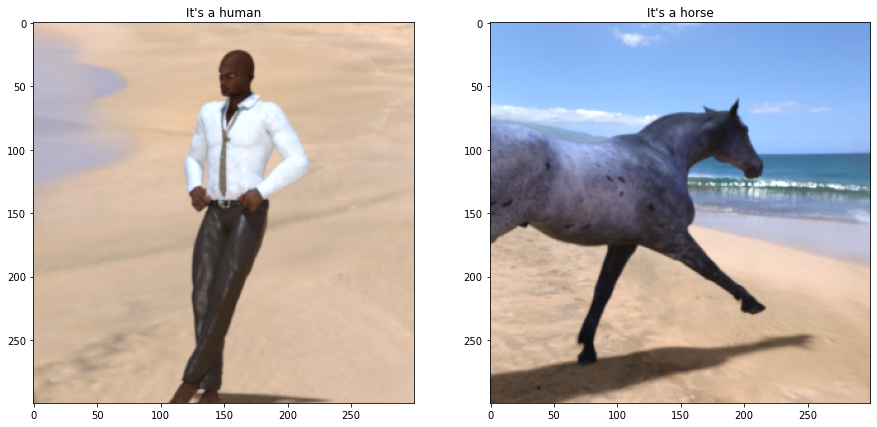

In [24]:
print('Note: 0 is horse and 1 is human\n')
print('Figure 1 is:', predict[50], '\n')
print('Figure 2 is:', predict[100])

labels = ['horse', 'human']
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(X_test[50])
ax1.set_title("It's a " + labels[int((predict[50]))])
ax2.imshow(X_test[100])
ax2.set_title("It's a " + labels[int((predict[100]))])

In [25]:
m = tf.keras.metrics.Accuracy()
m.update_state(predict, y_test)
m.result().numpy()

0.9587021

In [29]:
ls

Volume in drive D is Data
 Volume Serial Number is 52AC-A526

 Directory of d:\Medium\Tensorflow Image Classification with Transfer Learning\images

07/09/2020  18:20    <DIR>          .
07/09/2020  18:20    <DIR>          ..
07/09/2020  17:34            84.586 1.jpg
07/09/2020  18:18           605.109 2.png
07/09/2020  18:20           256.079 horse.jfif
               3 File(s)        945.774 bytes
               2 Dir(s)  379.160.735.744 bytes free


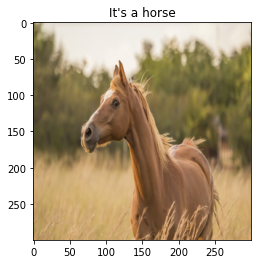

In [38]:
from PIL import Image

image = np.array(Image.open('horse.jfif').resize((300,300)))
plt.imshow(image)
image = image.reshape(1, 300, 300, 3)
plt.title("It's a " + labels[int(model.predict(image))])
plt.show()

In [46]:
X.shape

(1027, 300, 300, 3)